# Part 5 - Reverse Geocoding

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#The-required-location-parameter" data-toc-modified-id="The-required-location-parameter-2">The required <code>location</code> parameter</a></span></li><li><span><a href="#The-simple-reverse-geocode-examples" data-toc-modified-id="The-simple-reverse-geocode-examples-3">The simple reverse geocode examples</a></span><ul class="toc-item"><li><span><a href="#Example-1---location-input-as-list" data-toc-modified-id="Example-1---location-input-as-list-3.1">Example 1 - location input as list</a></span></li><li><span><a href="#Example-2---location-input-as-dict" data-toc-modified-id="Example-2---location-input-as-dict-3.2">Example 2 - location input as dict</a></span></li><li><span><a href="#Example-3---location-input-as-dict-with-sr" data-toc-modified-id="Example-3---location-input-as-dict-with-sr-3.3">Example 3 - location input as dict with sr</a></span></li><li><span><a href="#Example-4---location-input-as-Point-Geometry-object" data-toc-modified-id="Example-4---location-input-as-Point-Geometry-object-3.4">Example 4 - location input as Point Geometry object</a></span></li></ul></li><li><span><a href="#Reverse-geocode-a-location-clicked-on-the-map" data-toc-modified-id="Reverse-geocode-a-location-clicked-on-the-map-4">Reverse geocode a location clicked on the map</a></span></li><li><span><a href="#Get-result-as-intersection-instead-of-address-(return_intersection-param)" data-toc-modified-id="Get-result-as-intersection-instead-of-address-(return_intersection-param)-5">Get result as intersection instead of address (<code>return_intersection</code> param)</a></span></li><li><span><a href="#Get-results-in-desired-SR" data-toc-modified-id="Get-results-in-desired-SR-6">Get results in desired SR</a></span></li><li><span><a href="#Get-results-in-desired-language-(lang_code-param)" data-toc-modified-id="Get-results-in-desired-language-(lang_code-param)-7">Get results in desired language (<code>lang_code</code> param)</a></span></li><li><span><a href="#Customize-the-address-type-of-searches-(feature_types-param)" data-toc-modified-id="Customize-the-address-type-of-searches-(feature_types-param)-8">Customize the address type of searches (<code>feature_types</code> param)</a></span></li><li><span><a href="#Limit-searches-by-distance-param" data-toc-modified-id="Limit-searches-by-distance-param-9">Limit searches by <code>distance</code> param</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10">Conclusions</a></span></li></ul></div>

## Introduction

The `reverse_geocode()` function in the `arcgis.geocoding` module determines the address at a particular `x/y` location. You can pass the coordinates of a point location to the `geocoder` and get returned the address that is closest (or nearest) to the location.

<img src="https://developers.arcgis.com/rest/geocode/api-reference/GUID-3A7A77E6-2E26-44E2-A7BA-362DA4EFC0E4-web.png" />

In [1]:
from arcgis.geocoding import reverse_geocode

help(reverse_geocode)

Help on function reverse_geocode in module arcgis.geocoding._functions:

reverse_geocode(location: 'Union[list, dict, Point]', distance: 'Optional[float]' = None, out_sr: 'Optional[Union[int, SpatialReference]]' = None, lang_code: 'Optional[str]' = None, return_intersection: 'bool' = False, for_storage: 'bool' = False, geocoder: 'Optional[Geocoder]' = None, feature_types: 'Optional[str]' = None, location_top: 'str' = 'street')
    The ``reverse_geocode`` operation determines the address at a particular
    x/y location. You pass the coordinates of a point location to the
    geocoding service, and the service returns the address that is
    closest to the location.

    =================== ====================================================
    **Parameter**        **Description**
    ------------------- ----------------------------------------------------
    location            Required location input as list, dict (with or without SpatialReference),
                        or :clas

## The required `location` parameter

As shown in the help output above, the only required input parameter of `reverse_geocode()` is the [`location`](https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#ESRI_SECTION3_4909D4145D0B4D3EB2D28F916351BC58) parameter, which is the point from which to search for the closest address. The point can be represented as:
* a `list` of coordinates in either *[x, y]* or *[longitude, latitude]* format
* a `dict` object (with or without spatial reference)
* a [Point Geometry](/python/api-reference/arcgis.geometry.html#point)

The spatial reference of the list of coordinates is `WGS84` (in decimal degress), the same coordinate system as the World Geocoding Service.

Use a Python dictionary to meet the JSON formatting (see [Geometry objects](https://developers.arcgis.com/rest/services-reference/enterprise/geometry-objects) for details) requriments of the service to specify any other coordinate system for the input location. Specifically, set the spatial reference using its `well-known ID (WKID)` value. For a list of valid WKID values, see the [Using spatial references](https://developers.arcgis.com/rest/services-reference/enterprise/using-spatial-references/) help page.

* Example using the default `WGS84` spatial reference:
```
location=[103.8767227,1.3330736]
```
* Example using a dictionary and the default `WGS84` spatial reference:
```
location={"x": 103.876722, "y": 1.3330736}
```
* Example using a dictionary and specifying a spatial reference (`WGS84 Web Mercator Auxiliary Sphere`): 
```
location= {
    "x": 11563503,
    "y": 148410,
    "spatialReference": {"wkid": 3857}
}
```

## The simple reverse geocode examples

Next, we will look at different kinds of input for the `location` parameter - (1) list, (2) dict, (3) dict with sr, and (4) Point object. Note that, when composing a list containing x/y coordinates, the order is X,Y and not Y,X as in lat, long.

In [2]:
from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode

gis = GIS(profile="your_online_profile")

### Example 1 - location input as list

In [3]:
results = reverse_geocode([2.2945, 48.8583])

In [4]:
type(results)

dict

In [5]:
results

{'address': {'Match_addr': 'Le Jules Verne',
  'LongLabel': 'Le Jules Verne, Avenue Gustave Eiffel, 75007, 7e Arrondissement, Paris, Île-de-France, FRA',
  'ShortLabel': 'Le Jules Verne',
  'Addr_type': 'POI',
  'Type': 'French Food',
  'PlaceName': 'Le Jules Verne',
  'AddNum': '',
  'Address': 'Avenue Gustave Eiffel',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '7e Arrondissement',
  'City': 'Paris',
  'MetroArea': '',
  'Subregion': 'Paris',
  'Region': 'Île-de-France',
  'RegionAbbr': 'IDF',
  'Territory': '',
  'Postal': '75007',
  'PostalExt': '',
  'CntryName': 'France',
  'CountryCode': 'FRA',
  'X': 2.29499002216,
  'Y': 48.857664577355,
  'InputX': 2.2945,
  'InputY': 48.8583},
 'location': {'x': 2.29499002216,
  'y': 48.857664577355,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

### Example 2 - location input as dict

In [6]:
results = reverse_geocode(location={"x": 103.876722, "y": 1.3330736})
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'RegionAbbr': '',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CntryName': 'Singapore',
  'CountryCode': 'SGP',
  'X': 103.876669734659,
  'Y': 1.333215376983,
  'InputX': 103.876722,
  'InputY': 1.3330736},
 'location': {'x': 103.876669734659,
  'y': 1.333215376983,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

### Example 3 - location input as dict with sr

In [7]:
results = reverse_geocode(
    location= {
        "x": 11563503,
        "y": 148410,
        "spatialReference": {"wkid": 3857}
    }
)
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'RegionAbbr': '',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CntryName': 'Singapore',
  'CountryCode': 'SGP',
  'X': 103.876669734659,
  'Y': 1.333215376983,
  'InputX': 103.876714828619,
  'InputY': 1.333069425643},
 'location': {'x': 103.876669734659,
  'y': 1.333215376983,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

### Example 4 - location input as Point Geometry object

In [8]:
from arcgis.geometry import Geometry

pt = Geometry({
    "x": 11563503,
    "y": 148410,
    "spatialReference": {
        "wkid": 3857
    }
})

In [9]:
results = reverse_geocode(pt)
type(results)

dict

In [10]:
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'RegionAbbr': '',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CntryName': 'Singapore',
  'CountryCode': 'SGP',
  'X': 103.876669734659,
  'Y': 1.333215376983,
  'InputX': 103.876714828619,
  'InputY': 1.333069425643},
 'location': {'x': 103.876669734659,
  'y': 1.333215376983,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Reverse geocode a location and show on the map


In [ ]:
map1 = gis.map('Singapore')
map1

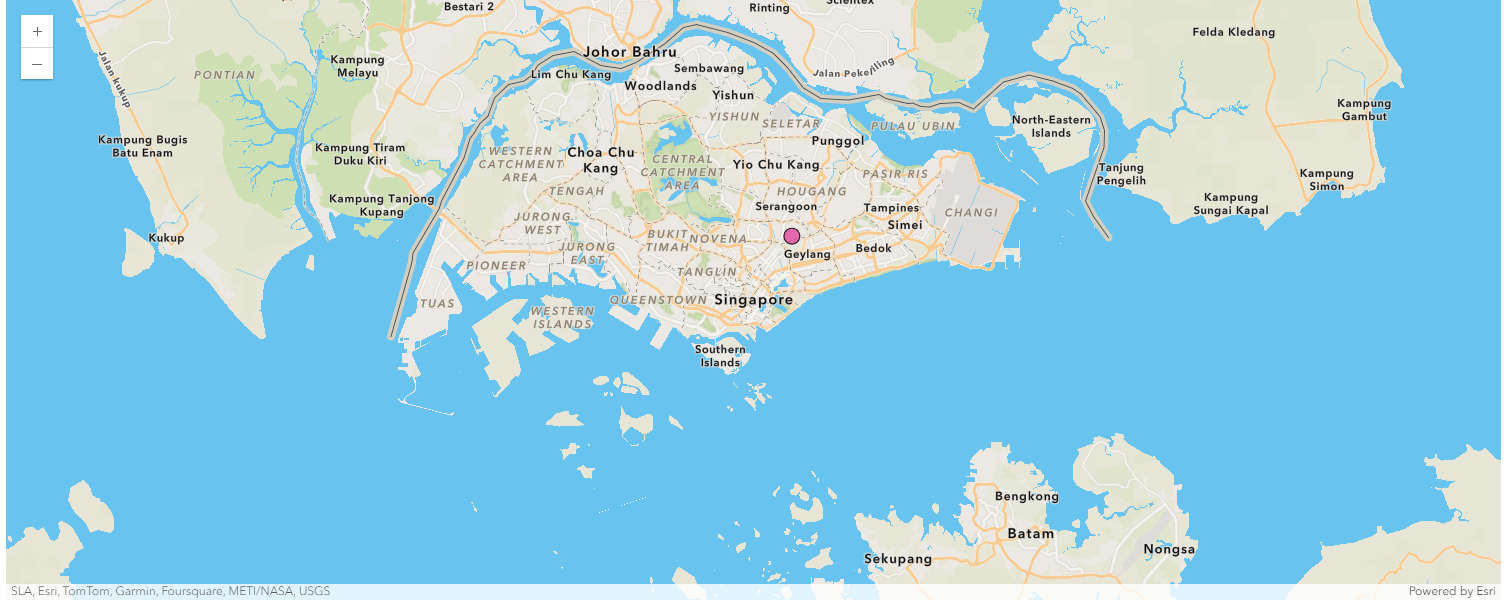

In [6]:
pt = Geometry({
    "x": 11563503,
    "y": 148410,
    "spatialReference": {
        "wkid": 3857
    }
})

results = reverse_geocode(pt)

In [10]:
mapx.content.draw(
    shape=Geometry(results["location"])
)

## Get result as intersection instead of address (`return_intersection` param)

Facts about the `return_intersection` parameter:
   - A Boolean which specifies whether the service should return the nearest street intersection or the nearest address to the input location. 
   - If True, then the closest intersection to the input location is returned; 
   - if False, then the closest address to the input location is returned. 
   - The default value is False.

See the [Ready-to-use Geocoding](https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#ESRI_SECTION3_6D2896E88F4640E38416EE9E87C517A3) document for full details.


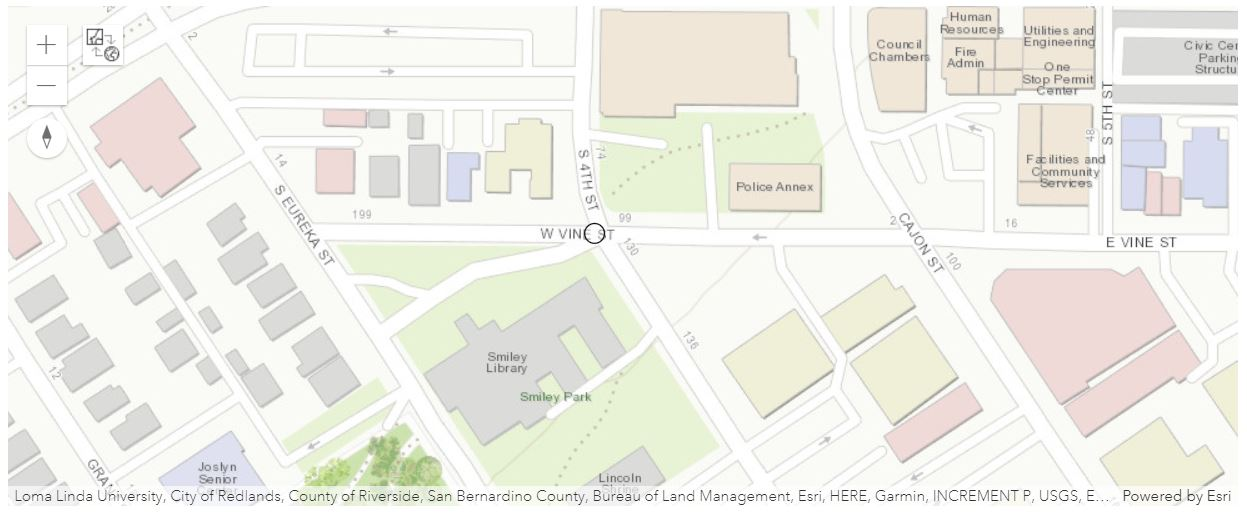

In [30]:
# Let's take a look at the intersection of W. Vine St & S 4th St in the city of Redlands, CA

In [25]:
from arcgis.geocoding import geocode
intersect_loc = geocode("S 4th St & W Vine, Redlands, CA")[0]['location']
print(intersect_loc)

{'x': -117.18361987601203, 'y': 34.0546600260095}


When the `return_intersection` parameter is not specified, or set to False, then the closest address to the input location is returned. We can see below that the returned address is a `StreetAddress`, instead of intersection, and that the matched addresses are of `Street number 130 to 134 on the S 4th St`.

In [26]:
reverse_geocode(intersect_loc)

{'address': {'Match_addr': '130-134 S 4th St, Redlands, California, 92373',
  'LongLabel': '130-134 S 4th St, Redlands, CA, 92373, USA',
  'ShortLabel': '130-134 S 4th St',
  'Addr_type': 'StreetAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '130',
  'Address': '130 S 4th St',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'South Redlands',
  'District': '',
  'City': 'Redlands',
  'MetroArea': 'Inland Empire',
  'Subregion': 'San Bernardino County',
  'Region': 'California',
  'Territory': '',
  'Postal': '92373',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -117.18367019351942,
  'y': 34.054620721017486,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

On the other hand, when set to `True`, then the closest intersection to the input location is returned. We can see this in the `Match_addr` and `Addr_Type` output fields shown below:

In [27]:
reverse_geocode(intersect_loc,
                return_intersection = True)

{'address': {'Match_addr': 'S 4th St & W Vine St, Redlands, California, 92373',
  'LongLabel': 'S 4th St & W Vine St, Redlands, CA, 92373, USA',
  'ShortLabel': 'S 4th St & W Vine St',
  'Addr_type': 'StreetInt',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'S 4th St & W Vine St',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'South Redlands',
  'District': '',
  'City': 'Redlands',
  'MetroArea': 'Inland Empire',
  'Subregion': 'San Bernardino County',
  'Region': 'California',
  'Territory': '',
  'Postal': '92373',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -117.18361987601203,
  'y': 34.05466002600951,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Get results in desired SR

Facts about the [`out_sr`](https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#ESRI_SECTION3_0320BDF1F86A4780B0B13991B03D74C4) parameter:

   - The spatial reference of the x/y coordinates returned by a geocode request. This is useful for applications using a map with a spatial reference different than that of the geocode service.
   - The spatial reference can be specified as either a `well-known ID (WKID)` or as `a JSON spatial reference object`. If `out_sr` is not specified, the spatial reference of the output locations is the same as that of the service. The World Geocoding Service spatial reference is `WGS84 (WKID = 4326)`.

Example (`102100` is the `WKID` for the Web Mercator projection):
```
out_sr=102100
```

The first example below shows a version of [Example 4](#example-4---location-input-as-point-geometry-object), when `our_sr` is specified different than WGS84:

In [31]:
reverse_geocode(
    location = {
        'x': 103.87671885261159,
        'y': 1.333058719212687,
        'spatialReference': {'wkid': 4326, 'latestWkid': 4326}
    },
    out_sr = 3857
)

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 11563503.447948763,
  'y': 148408.80784300127,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

## Get results in desired language (`lang_code` param)

Facts about the [`lang_code`](https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#ESRI_SECTION3_94C07901C08E42E9B4CD49C9BFF78D60) parameter:

   - Sets the language in which reverse-geocoded addresses are returned. Addresses in many countries are available in more than one language. In these cases, the `lang_code` parameter can be used to specify which language should be used for addresses returned by the `reverse_geocode()` method. This is useful for ensuring that addresses are returned in the expected language by reverse geocoding functionality in an application. For example, a web application could be designed to get the browser language and then pass it as the `lang_code` parameter value in a `reverse_geocode` request.
   - See this [table]("https://developers.arcgis.com/rest/geocode/api-reference/geocode-coverage.htm#GUID-D61FB53E-32DF-4E0E-A1CC-473BA38A23C0") of supported countries for valid language code values in each country. 
   
Now let's look at an example of `reverse_geocode()` using the `land_code` parameter applied to the starting point of the *Great Wall of China*, and the *Taj Marble* in India:

In [44]:
# returning Simplified Chinese
reverse_geocode(
    location = {'x': 119.79533000000004, 
                'y': 39.96675000000005}, 
                lang_code = "ZH"
)

{'address': {'Match_addr': '河北省秦皇岛市山海关区',
  'LongLabel': '河北省秦皇岛市山海关区',
  'ShortLabel': '河北省秦皇岛市山海关区',
  'CountryCode': 'CHN',
  'City': '秦皇岛市',
  'Neighborhood': '山海关区',
  'Region': '河北省',
  'Address': '河北省秦皇岛市山海关区',
  'Addr_type': 'Locality',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Block': '',
  'Sector': '',
  'District': '',
  'MetroArea': '',
  'Subregion': '',
  'Territory': '',
  'Postal': '',
  'PostalExt': ''},
 'location': {'x': 119.744545,
  'y': 40.018464,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [46]:
# returns in Hindi
reverse_geocode({
    'x': 74.81476000000004, 
    'y': 34.02453000000003
     },
    lang_code="HIN")

{'address': {'Match_addr': 'एनएच-1ए, नातिपुरा, श्रीनगर, जम्मू और कश्मीर, 190015',
  'LongLabel': 'एनएच-1ए, नातिपुरा, श्रीनगर, जम्मू और कश्मीर, 190015, IND',
  'ShortLabel': 'एनएच-1ए',
  'Addr_type': 'StreetName',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'एनएच-1ए',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': 'नातिपुरा',
  'City': 'श्रीनगर',
  'MetroArea': '',
  'Subregion': 'श्रीनगर',
  'Region': 'जम्मू और कश्मीर',
  'Territory': '',
  'Postal': '190015',
  'PostalExt': '',
  'CountryCode': 'IND'},
 'location': {'x': 74.81476450480069,
  'y': 34.024511515995734,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Customize the address type of searches (`feature_types` param)

The `feature_types` parameter:
 - Limits the possible match types performed by the `reverse_geocode` method. 
 - If a single value is included, the search tolerance for the input feature type is `500` meters. 
 - If multiple values (separated by a comma, with no spaces) are included, the default search distances specified in the feature type [hierarchy table]("https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#GUID-FC97069F-310B-44A8-9DD1-8EC188170831") are applied.
 - The list below includes the valid values for the `feature_types` parameter:
   - <b>StreetInt, DistanceMarker, StreetAddress, StreetName, POI, PointAddress, Postal, and Locality</b>

See the reference documente [here](https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#ESRI_SECTION3_1FE6B6D350714E45B2707845ADA22E1E) for more information.

Let's see an example of reverse geocoding for `the Yosemite National Park` (at Stanislaus) and how changing the `feature_types` from `POI` to `StreetAddress`, or other types in getting navigable address for GPS, will be different. Note that there will be different output of the X,Y coordinates in the returned dict:

In [ ]:
map3 = gis.map("Stanislaus, CA")
map3.zoom = 19
map3

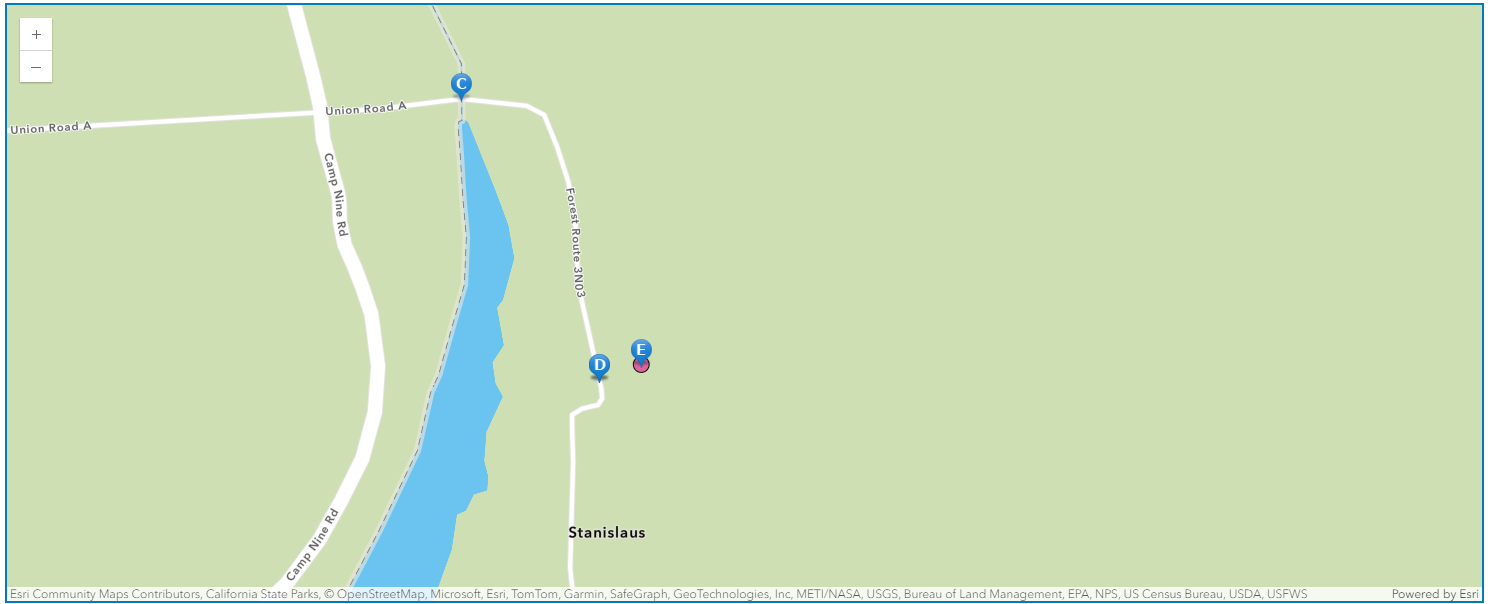

In [39]:
park_xy = Geometry({'x':-13399528.102591 , 'y':4599075.538836, 'spatialReference': {'wkid':102100}})
map3.content.draw(park_xy)

In [40]:
# without specifying the `feature_types`
from arcgis.map.symbols import PictureMarkerSymbolEsriPMS
park_a = reverse_geocode(park_xy)
map3.content.draw(
    shape=park_a["location"], 
    symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,
                                           "xoffset":0,
                                           "yoffset":8.15625,
                                           "type":"esriPMS",
                                           "url":"http://static.arcgis.com/images/Symbols/AtoZ/blueA.png",
                                           "contentType":"image/png",
                                           "width":15.75,
                                           "height":21.75}
                                       )
)

display(park_a)

{'address': {'Match_addr': 'Forest Route 3N03, MI Wuk Village, California, 95346',
  'LongLabel': 'Forest Route 3N03, MI Wuk Village, CA, 95346, USA',
  'ShortLabel': 'Forest Route 3N03',
  'Addr_type': 'StreetName',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'Forest Route 3N03',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'MI Wuk Village',
  'MetroArea': '',
  'Subregion': 'Tuolumne County',
  'Region': 'California',
  'RegionAbbr': 'CA',
  'Territory': '',
  'Postal': '95346',
  'PostalExt': '',
  'CntryName': 'United States',
  'CountryCode': 'USA',
  'X': -120.370234753138,
  'Y': 38.138900996563,
  'InputX': -120.370008945465,
  'InputY': 38.138964926295},
 'location': {'x': -120.370234753138,
  'y': 38.138900996563,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
  'type': 'point'}}

In [42]:
# search_tolerance = 10 meters
park_b = reverse_geocode(park_xy, feature_types = "StreetInt")
map3.content.draw(
    shape=park_b["location"], 
    symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,
                                           "xoffset":0,
                                           "yoffset":8.15625,
                                           "type":"esriPMS",
                                           "url":"http://static.arcgis.com/images/Symbols/AtoZ/blueC.png",
                                           "contentType":"image/png",
                                           "width":15.75,
                                           "height":21.75}
                                       )
)

display(park_b)

{'address': {'Match_addr': 'Forest Route 3N03 & Union Road A, MI Wuk Village, California, 95346',
  'LongLabel': 'Forest Route 3N03 & Union Road A, MI Wuk Village, CA, 95346, USA',
  'ShortLabel': 'Forest Route 3N03 & Union Road A',
  'Addr_type': 'StreetInt',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'Forest Route 3N03 & Union Road A',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'MI Wuk Village',
  'MetroArea': '',
  'Subregion': 'Tuolumne County',
  'Region': 'California',
  'RegionAbbr': 'CA',
  'Territory': '',
  'Postal': '95346',
  'PostalExt': '',
  'CntryName': 'United States',
  'CountryCode': 'USA',
  'X': -120.37097308802,
  'Y': 38.140086302599,
  'InputX': -120.370008945465,
  'InputY': 38.138964926295},
 'location': {'x': -120.37097308802,
  'y': 38.140086302599,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
  'type': 'point'}}

In [43]:
# search_tolerance = 3 meters
park_d = reverse_geocode(
    location=park_xy, 
    feature_types = "StreetAddress,DistanceMarker,StreetName"
)

map3.content.draw(
    shape=park_d["location"], 
    symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,
                                           "xoffset":0,
                                           "yoffset":8.15625,
                                           "type":"esriPMS",
                                           "url":"http://static.arcgis.com/images/Symbols/AtoZ/blueD.png",
                                           "contentType":"image/png",
                                           "width":15.75,
                                           "height":21.75}
                                       )
)

display(park_d)

{'address': {'Match_addr': 'Forest Route 3N03, MI Wuk Village, California, 95346',
  'LongLabel': 'Forest Route 3N03, MI Wuk Village, CA, 95346, USA',
  'ShortLabel': 'Forest Route 3N03',
  'Addr_type': 'StreetName',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'Forest Route 3N03',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'MI Wuk Village',
  'MetroArea': '',
  'Subregion': 'Tuolumne County',
  'Region': 'California',
  'RegionAbbr': 'CA',
  'Territory': '',
  'Postal': '95346',
  'PostalExt': '',
  'CntryName': 'United States',
  'CountryCode': 'USA',
  'X': -120.370234753138,
  'Y': 38.138900996563,
  'InputX': -120.370008945465,
  'InputY': 38.138964926295},
 'location': {'x': -120.370234753138,
  'y': 38.138900996563,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
  'type': 'point'}}

In [44]:
# search_tolerance = within boundaries
# If the input location intersects multiple boundaries, the feature with the smallest area is returned.
park_e = reverse_geocode(
    location=park_xy, 
    feature_types = "Locality,Postal"
)

map3.content.draw(
    shape=park_e["location"], 
    symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,
                                           "xoffset":0,
                                           "yoffset":8.15625,
                                           "type":"esriPMS",
                                           "url":"http://static.arcgis.com/images/Symbols/AtoZ/blueE.png",
                                           "contentType":"image/png",
                                           "width":15.75,"height":21.75}
                                       )
)

display(park_e)

{'address': {'Match_addr': '95346, MI Wuk Village, California',
  'LongLabel': '95346, MI Wuk Village, CA, USA',
  'ShortLabel': '95346',
  'Addr_type': 'Postal',
  'Type': '',
  'PlaceName': '95346',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'MI Wuk Village',
  'MetroArea': '',
  'Subregion': 'Tuolumne County',
  'Region': 'California',
  'RegionAbbr': 'CA',
  'Territory': '',
  'Postal': '95346',
  'PostalExt': '',
  'CntryName': 'United States',
  'CountryCode': 'USA',
  'X': -120.370008945465,
  'Y': 38.138964926295,
  'InputX': -120.370008945465,
  'InputY': 38.138964926295},
 'location': {'x': -120.370008945465,
  'y': 38.138964926295,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
  'type': 'point'}}

In [46]:
park_f = reverse_geocode(
    locaton= {
        'x':-13399528.102591 , 
        'y':4599075.538836
    }, 
    feature_types = "POI area"
)

map3.content.draw(
    shape=park_f["location"], 
    symbol = PictureMarkerSymbolEsriPMS(**{"angle":0,
                                           "xoffset":0,
                                           "yoffset":8.15625,
                                           "type":"esriPMS",
                                           "url":"http://static.arcgis.com/images/Symbols/AtoZ/blueF.png",
                                           "contentType":"image/png",
                                           "width":15.75,
                                           "height":21.75}
                                       )
)

display(park_f)

{'address': {'Match_addr': 'Ozero Shybyndy',
  'LongLabel': 'Ozero Shybyndy',
  'ShortLabel': 'Ozero Shybyndy',
  'Addr_type': 'POI',
  'Type': 'Lake',
  'PlaceName': 'Ozero Shybyndy',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': '',
  'MetroArea': '',
  'Subregion': '',
  'Region': '',
  'RegionAbbr': '',
  'Territory': '',
  'Postal': '',
  'PostalExt': '',
  'CntryName': '',
  'CountryCode': '',
  'X': 0.0,
  'Y': 90.0,
  'InputX': -13399528.102591,
  'InputY': 4599075.538836},
 'location': {'x': 0.0,
  'y': 90.0,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
  'type': 'point'}}

As we can see from the map above, `park_a`, `park_d`, `park_e` and `park_f` all point to the same location (the centroid of Yosemite National Park), while `park_b` and `park_c` are slightly offset from the centroid.

## Limit searches by `distance` param
Here, note that default distance varies by feature_types and more can be learnt from here

`distance` parameter
 - The optional distance parameter allows you to specify a radial distance in meters to search for an address from the specified location. If no distance value is specified, then the value is assumed to be 100 meters.

Example:
```
distance=50
```

In [128]:
# search_tolerance = 10 meters
reverse_geocode(
    location={'x': -87.62330985,'y':41.88270585},
    feature_types = "POI",
    distance=10
)

{'address': {'Match_addr': 'The Bean',
  'LongLabel': 'The Bean, Chicago, IL, 60603, USA',
  'ShortLabel': 'The Bean',
  'Addr_type': 'POI',
  'Type': 'Tourist Attraction',
  'PlaceName': 'The Bean',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Loop',
  'District': '',
  'City': 'Chicago',
  'MetroArea': 'Chicagoland',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60603',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62351981667449,
  'y': 41.88258590496559,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [135]:
# search_tolerance = 500 meters
reverse_geocode(
    location={'x': -87.62330995,'y':41.88270595},
    distance=500
)

{'address': {'Match_addr': 'Park Cafe',
  'LongLabel': 'Park Cafe, 11 N Michigan Ave, Chicago, IL, 60602, USA',
  'ShortLabel': 'Park Cafe',
  'Addr_type': 'POI',
  'Type': 'Restaurant',
  'PlaceName': 'Park Cafe',
  'AddNum': '11',
  'Address': '11 N Michigan Ave',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Chicago',
  'MetroArea': '',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60602',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62330499999996,
  'y': 41.88267500000006,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Conclusions

In Part 5 of the Series, we have explored how to perform `reverse_geocode()` with different input (e.g. JSON, `List` object, or Point `Geometry` object) and optional parameters to limit the search results. The optional parameters used included `lang_code`, `distance`, `feature_types`, etc. In the next notebook, we will discuss how to work with a customized `geocoder`.